In [164]:
### Datos
import pandas as pd
import numpy as np

#Graficos
import matplotlib.pyplot as plt
import seaborn as sns

#Statsmodels
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from statsmodels.stats.diagnostic import het_breuschpagan, het_white

#Skelearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics, preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

#scipy
from scipy import stats
from scipy.stats import shapiro

# Descripción del problema

En el contexto de la infraestructura gasoductos, el **ROD** (rate of drop) se refiere a la velocidad con la que disminuye la presión en un intervalo de tiempo determinado, expresado en unidades de psig por minuto. Para salvaguardar los gasoductos, se instalan válvulas automatizadas a lo largo de su infraestructura, y uno de los parámetros clave que se configura en estos dispositivos es el ROD. 

En esencia, cuando el equipo detecta que este valor se supera, toma automáticamente la decisión de cerrar o seccionar el gasoducto.
El transporte de gas a través de tuberías a alta presión es un proceso caracterizado por cambios lentos en su comportamiento. En condiciones normales de operación, no se anticipan variaciones abruptas en la presión. Generalmente, el ROD puede originarse debido a roturas o fugas, la entrada o salida de equipos compresores, o cambios súbitos en las condiciones de flujo en los puntos de entrada y salida.
Por tanto, es crucial configurar adecuadamente el ROD para garantizar que las protecciones se activen frente a condiciones anómalas de operación, preservando así la seguridad de todas las partes involucradas.

El presente dataset corresponde a valores de ROD máximo y volumen a través de una fuga obtenidos a partir de las combinaciones de las siguientes variables:

- **leak_dia**: diámetro de una rotura (**pulgadas**).
- **leak_distance**: distancia de la rotura hasta el punto de medición del ROD (**km**).
- **pressure**: presión de entrada al escenario (**psig**).
- **flow_pipe**: flujo a través de la tubería (**Mpcd**).
- **ROD**: tasa de caída de la presión (**psig**)
- **leak_flow**: flujo máximo de la fuga (**Mpcd**)

El propósito de este estudio es examinar las relaciones entre las variables previamente descritas y su portencial para pedecir el Rate of Drop (ROD) que se generará. Esta información se espera utilizar para establecer los valores óptimos de ROD a configurar en las líneas de transporte. El modelo busca responder preguntas específicas, tales como:

•	¿Para una línea operando a una presión y flujo determinado, cuál es el ROD al que se debe configurar la protección para detectar una fuga de un diámetro equivalente en pulgadas? ¿Este ROD configurado corresponde a un flujo que pueda cambiar en condiciones normales de operación, como la entrada o salida de compresores, e incluso cambios en el flujo de las salidas o entradas de gas?

•	En caso de una rotura o fuga, ¿a qué ROD equivalente debo configurar la protección si no deseo ventear a la atmósfera una cantidad específica de gas? ¿A qué diámetro equivalente de fuga corresponde este volumen, considerando las condiciones operativas planteadas?

Este estudio pretende proporcionar una comprensión detallada de cómo las variables estudiadas afectan el ROD, permitiendo así la determinación precisa de valores óptimos para la configuración de protecciones en las líneas de transporte de gas considerando su impacto operativo y medio ambiental.

# Exploración de los datos

El primer paso consiste en la exploración de los datos y plantear las hipótesis iniciales que 

In [166]:
rod = pd.read_excel('../data/rod/train_rod.xlsx')
rod.head()

,leak_dia,leak_distance,pressure,flow_pipe,rod,leak_flow
0,3.5,15.3333,1190,76.752,31.966865,152.279497
1,3.5,7.6667,653,189.540,17.530478,93.460428
2,3.5,7.6667,653,58.729,16.312640,81.364855
3,3.5,7.6667,1016,76.752,26.121132,129.525084
4,3.5,15.3333,1016,189.540,22.906330,127.163212


c:\Users\lull00t\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


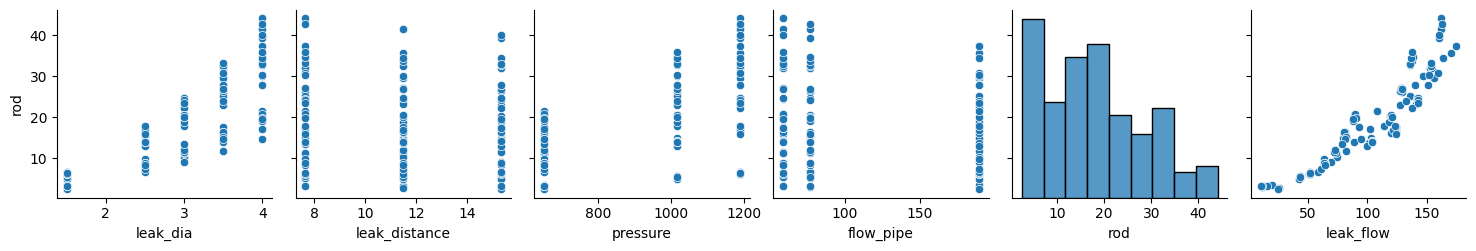

In [226]:
sns.pairplot(rod, y_vars="rod");

<Axes: >

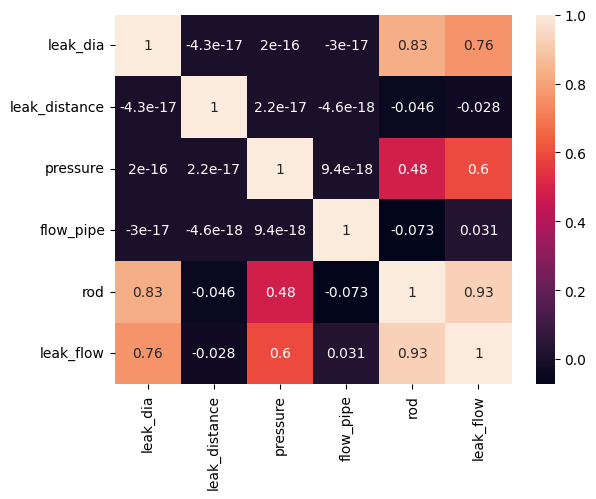

In [173]:
sns.heatmap(rod.corr(), annot=True)

Con esto 

Como es esperado, el diámetro y el flujo de la fuga tienen una relación lineal, 

# Modeling

El definir el algoritmo idoneo para entender este fenómeno se evaluarán los siguientes algoritmos:

- Regresión lineal
- Arboles de regresión
- Random forest de regresión
- SVM (SVR)

Como la validez de una regresión lineal parte de entender y 


In [174]:
X, y = rod.drop(columns=["rod",'leak_flow']), rod["rod"]

## Linear Regression


### Modelos de regresión 1:

In [175]:
# Construir el modelo de regresión lineal con todas las variables
X_c = sm.add_constant(X)
RL_total = sm.OLS(y, X_c).fit()
print(RL_total.summary())

                            OLS Regression Results                            
Dep. Variable:                    rod   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     417.6
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           3.96e-73
Time:                        14:49:59   Log-Likelihood:                -332.02
No. Observations:                 135   AIC:                             674.0
Df Residuals:                     130   BIC:                             688.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -29.5944      1.711    -17.294

In [176]:
RL_total.resid

0      2.453045
1      0.477360
2     -2.481522
3     -0.644113
4     -1.170493
         ...   
130    0.454049
131   -2.528184
132   -2.871762
133   -2.083435
134   -4.648046
Length: 135, dtype: float64

In [177]:
RL_total.params

const           -29.594440
leak_dia         10.167672
leak_distance    -0.154861
pressure          0.022620
flow_pipe        -0.013310
dtype: float64

In [178]:
RL_total.fittedvalues

0      29.513820
1      17.053118
2      18.794162
3      26.765245
4      24.076823
         ...    
130     8.032861
131    16.597573
132    16.837452
133    16.003944
134    20.533406
Length: 135, dtype: float64

### Modelos de regresión 2:

In [179]:
# Construir el modelo de regresión lineal
RL_dp = sm.OLS(y, X_c.drop(columns="leak_distance")).fit()
print(RL_dp.summary())

                            OLS Regression Results                            
Dep. Variable:                    rod   R-squared:                       0.926
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     543.8
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           1.02e-73
Time:                        14:49:59   Log-Likelihood:                -333.97
No. Observations:                 135   AIC:                             675.9
Df Residuals:                     131   BIC:                             687.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -31.3753      1.463    -21.441      0.0

In [180]:
anova_result = sm.stats.anova_lm(RL_dp, RL_total)
print(anova_result)

# Interpreta el resultado de ANOVA
if anova_result['Pr(>F)'][1] < 0.05:
    print("Hay una diferencia significativa entre los dos modelos.")
else:
    print("No hay una diferencia significativa entre los dos modelos, por tanto, se elige el modelo restringido")

   df_resid          ssr  df_diff    ss_diff         F   Pr(>F)
0     131.0  1113.344027      0.0        NaN       NaN      NaN
1     130.0  1081.628468      1.0  31.715559  3.811866  0.05304
No hay una diferencia significativa entre los dos modelos, por tanto, se elige el modelo restringido


Con lo anterior, se determina que 

In [181]:
# Se excluye del resto desl análisis esta variable.
X = X.drop(columns=["leak_distance"])

### Model adequacy checking

El procedimeinto a continuación 

#### Análisis de residuos

La media de los residuos: 2.0723110470431426e-12


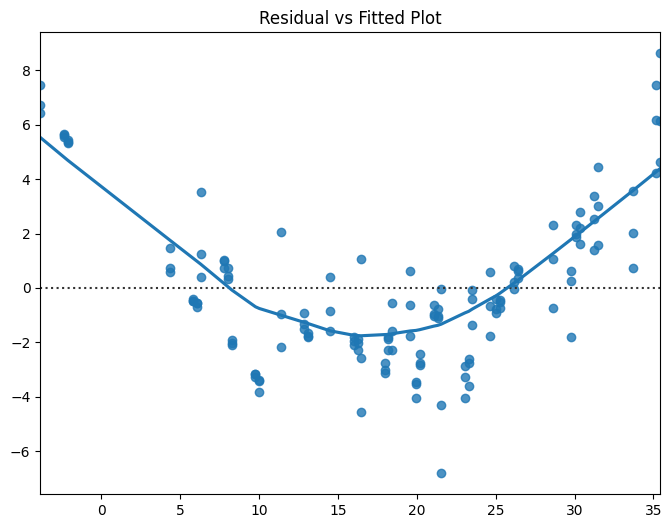

In [182]:
print("La media de los residuos: {}".format(RL_dp.resid.mean()))
plt.figure(figsize=(8, 6))
sns.residplot(x=RL_dp.fittedvalues, y=RL_dp.resid, lowess=True)
plt.title('Residual vs Fitted Plot')
plt.show()

In [183]:
# Realiza la prueba de Breusch-Pagan
_, p_value, _, _ = het_breuschpagan(RL_dp.resid, Xtrain_c)
print(f'p-value for Breusch-Pagan test: {p_value}')
if p_value <= 0.005:
    print("Hay evidencia de heterocedasticidad (varianza no constante).")
else:
    print("No hay suficiente evidencia para sugerir heterocedasticidad (varianza constante).")

p-value for Breusch-Pagan test: 0.35149294533891157
No hay suficiente evidencia para sugerir heterocedasticidad (varianza constante).


<Figure size 800x600 with 0 Axes>

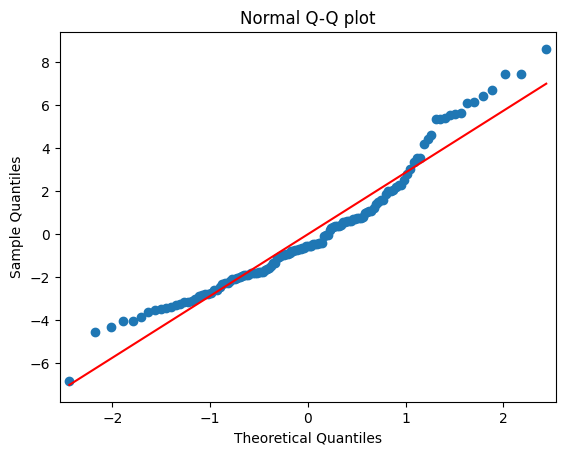

In [184]:
# 2. Normalidad de los residuos
plt.figure(figsize=(8, 6))
sm.qqplot(RL_dp.resid, line='s')
plt.title('Normal Q-Q plot')
plt.show()

c:\Users\lull00t\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


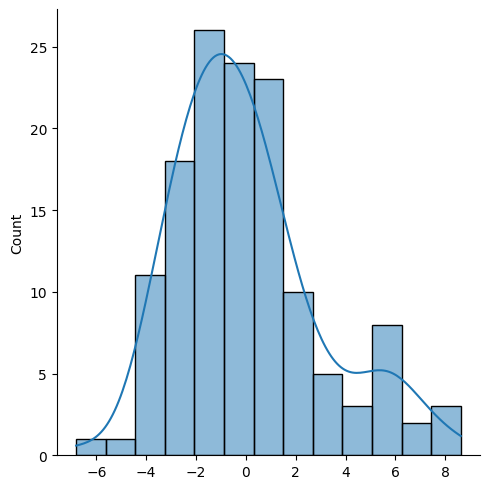

In [186]:
sns.displot(RL_dp.resid, kde=True);

In [187]:
poly = PolynomialFeatures(degree=2)
Xtrain_poly = poly.fit_transform(Xtrain)

In [188]:
# Construir el modelo de regresión lineal
RL_ajust = sm.OLS(ytrain, Xtrain_poly).fit()
print(RL_ajust.summary())

                            OLS Regression Results                            
Dep. Variable:                    rod   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1032.
Date:                Fri, 08 Mar 2024   Prob (F-statistic):           6.77e-93
Time:                        14:50:00   Log-Likelihood:                -159.56
No. Observations:                 108   AIC:                             339.1
Df Residuals:                      98   BIC:                             365.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.4926      4.052      2.343      0.0

La media de los residuos: -2.4761048437964234e-09


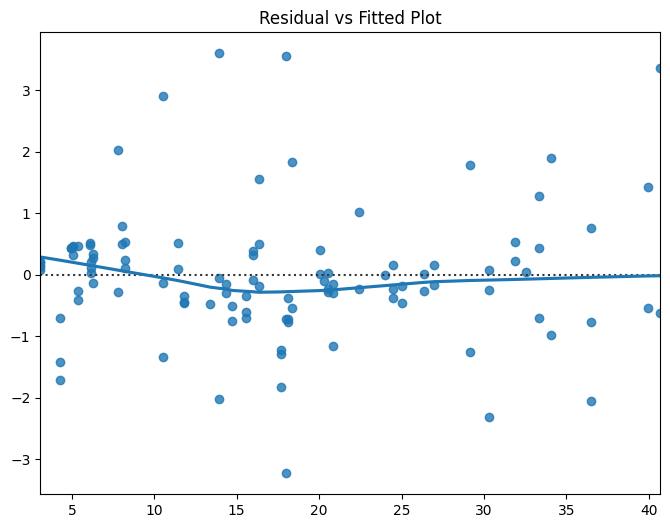

In [189]:
print("La media de los residuos: {}".format(RL_ajust.resid.mean()))
plt.figure(figsize=(8, 6))
sns.residplot(x=RL_ajust.fittedvalues, y=RL_ajust.resid, lowess=True)
plt.title('Residual vs Fitted Plot')
plt.show()

<Figure size 800x600 with 0 Axes>

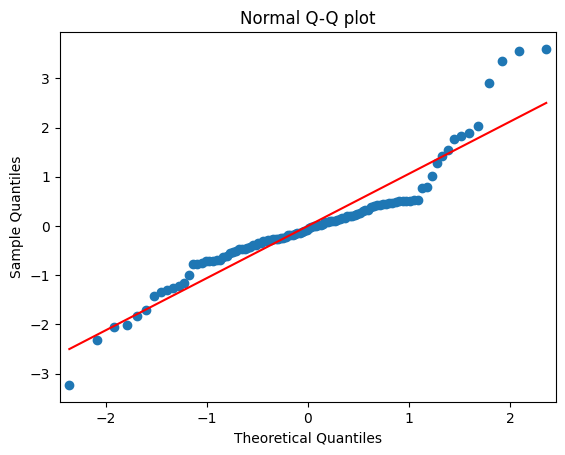

In [230]:
# 2. Normalidad de los residuos
plt.figure(figsize=(8, 6))
sm.qqplot(RL_ajust.resid, line='s')
plt.title('Normal Q-Q plot')
plt.show();

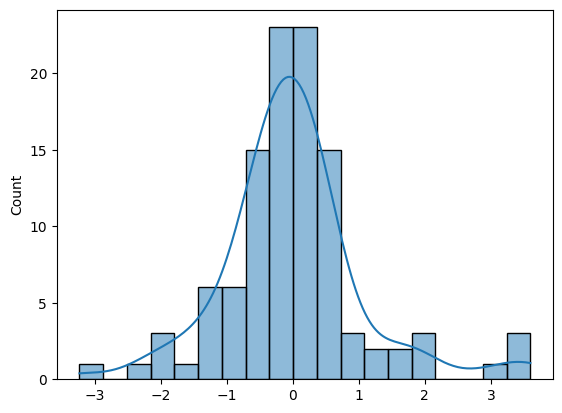

In [229]:
sns.histplot(RL_ajust.resid, kde=True);

In [228]:
# Realiza la prueba de Durbin-Watson
durbin_watson_statistic = sm.stats.stattools.durbin_watson(RL_ajust.resid)

print(f'Durbin-Watson statistic: {durbin_watson_statistic}')

# Interpreta el resultado
if durbin_watson_statistic >= 1.5 and durbin_watson_statistic <= 2.5 :
    print('Residuales aleatorios, independientes')
else:
    print('Residuales no aleatorios, dependientes.')

Durbin-Watson statistic: 1.9035834265543234
Residuales aleatorios, independientes


##  Model validation

In [194]:
Xtrain.head()

,leak_dia,pressure,flow_pipe
35,3.0,1190,76.752
60,1.5,1016,58.729
33,3.0,653,189.540
87,4.0,653,58.729
134,2.5,1190,76.752


In [196]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=123)

In [222]:
# Definir los modelos
models = {
    'PolynomialRegression': Pipeline([
        ('poly', PolynomialFeatures()),
        ('linear', LinearRegression(fit_intercept=True))
    ]),
    'RandomForestRegressor': RandomForestRegressor(),
    'SVR': SVR(kernel='poly'),
    'DecisionTreeRegressor':DecisionTreeRegressor()
}

# Definir los parámetros a ajustar para cada modelo
params = {
    'PolynomialRegression': {'poly__degree': [2,3,4,5]},
    'RandomForestRegressor': {'n_estimators': [100,200,500]},
    'SVR': {},
    'DecisionTreeRegressor':{}
}

# Se evalúa cada modelo utilizando Grid Search
grid_results = []
best_models = {}
for name, model in models.items():
    #Estimators have a scor method providing a default evaluation criterion for the problem they are designed to solve
    grid_search = GridSearchCV(model, params[name], cv=5) 
    grid_search.fit(Xtrain, ytrain)
    best_models[name] = grid_search.best_estimator_
    grid_results.append({"name": name ,"hyperparameters":grid_search.best_params_, "score": grid_search.best_score_ , "model": grid_search.best_estimator_ })

best_model_report = pd.DataFrame(grid_results).sort_values(by="score", ascending=False)
best_model_report

,name,hyperparameters,score,model
0,PolynomialRegression,{'poly__degree': 3},0.985241,"(PolynomialFeatures(degree=3), LinearRegressio..."
1,RandomForestRegressor,{'n_estimators': 100},0.978207,"(DecisionTreeRegressor(max_features=1.0, rando..."
3,DecisionTreeRegressor,{},0.976854,DecisionTreeRegressor()
2,SVR,{},0.122599,SVR(kernel='poly')


## Best model training performace

In [213]:
best_model = max(grid_results, key= lambda x: x['score'])
best_model = best_model['model']
best_model.fit(Xtrain, ytrain)
ytrain_pred = best_model.predict(Xtrain)

print('MSE on training set:', mean_squared_error(ytrain, ytrain_pred))
print('RMSE on training set:', np.sqrt(mean_squared_error(ytrain, ytrain_pred)))
print('R squared on training set:', r2_score(ytrain, ytrain_pred))

MSE on training set: 0.894565703964038
RMSE on training set: 0.9458148359822012
R squared on training set: 0.9916872534619877


## Best model test performace

In [214]:
ytest_pred = best_model.predict(Xtest)
print('MSE on training set:', mean_squared_error(ytest, ytest_pred))
print('RMSE on training set:', np.sqrt(mean_squared_error(ytest, ytest_pred)))
print('R squared on training set:', r2_score(ytest, ytest_pred))

MSE on training set: 0.523229370002888
RMSE on training set: 0.7233459545769839
R squared on training set: 0.9953816492040095


## Best model performace with new data

In [215]:
test_rod = pd.read_excel('../data/rod/test_rod.xlsx')
Xnew, ynew = test_rod.drop(columns=["rod", "leak_flow", "leak_distance"]), test_rod["rod"]
New_predict = best_model.predict(Xnew)

print('MSE on training set:', mean_squared_error(ynew, New_predict))
print('RMSE on training set:', np.sqrt(mean_squared_error(ynew, New_predict)))
print('R squared on training set:', r2_score(ynew, New_predict))

MSE on training set: 0.9034763518173384
RMSE on training set: 0.9505137304728104
R squared on training set: 0.9917844981571855


### Model export

Finalmente, se exporta el modelo para cargar a la aplicación

In [216]:
import joblib
joblib.dump(best_model, 'best_regressor.pkl')

['best_regressor.pkl']

# Rod vs Leak_Flow

<Axes: xlabel='rod', ylabel='leak_flow'>

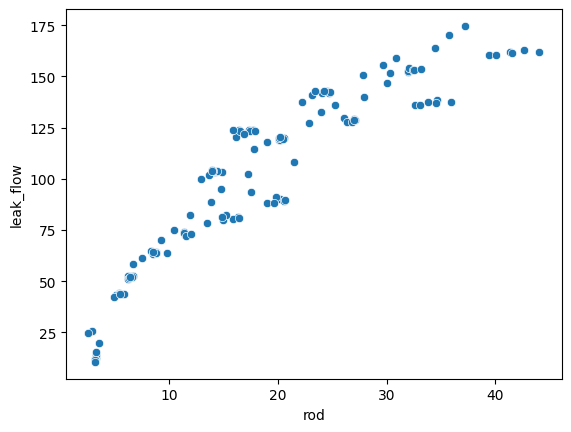

In [217]:
sns.scatterplot(data=rod, x="rod", y="leak_flow")

In [220]:
# Construir el modelo de regresión lineal con todas las variables
Xtrain_flow, ytrain_flow  = rod[["rod"]].copy(), rod["leak_flow"]
Xtrain_flow["rod^2"] = Xtrain_flow["rod"]**2

rf_tree = RandomForestRegressor(random_state=0, n_estimators=100)
rf_tree.fit(Xtrain_flow,ytrain_flow)
rf_tree_y_pred = rf_tree.predict(Xtrain_flow)

print('MSE on training set:', mean_squared_error(ytrain_flow, rf_tree_y_pred))
print('RMSE on training set:', np.sqrt(mean_squared_error(ytrain_flow, rf_tree_y_pred)))
print('R squared on training set:', r2_score(ytrain_flow, rf_tree_y_pred))

MSE on training set: 21.952046087696267
RMSE on training set: 4.685301066921555
R squared on training set: 0.9878832320692028


# Conclusiones de la Modelación

- En la modelación se inició con la especificación de la regresión, dónde  se utilizan todas las varaibles explicativas. Con esta primera regresión se identifica que la variable "leak_distance" no es singificativa. Para validar que el modelo restrigido es capaz de explicar la varianza se comparan los modelos estadíticamente con un anova.

- Al tener los atributos a incluir en la regresión, se cosntruye y analizan los residuos de una regresión lineal. Con esto, se encoentró que una regresión linea nos es capaz de identificar 


ealizar una análisis de los residuos, se detectó un patrón

- 


Con el analisis, fue posible concluir que el fenómeno y las variables estudiadas guardan una relación que no sólo es lineal.



leak_dia -7
pressure - 0
flow_pipe 0


Apoyados en la regresión construida es posible estimar el ROD en diferentes escenario operativos, además, en la relación lineal existente entre el ROD y el flujo de fuga, es pos

Caso de uso 1:
¿Qué valor de ROD se debe configurar en una protección para detectar una rotura de 3” en una línea de transporte que opera a 900 psig de presión y 100 mpcd? ¿Qué cambio de volúmenes abruptos puede tolerar la protección sin que actúe?

rod = 25 -> flujo 100 m



Caso de uso 2:
Si se tiene un cliente que tiene cambios de flujos abruptos de 0 a 70 Mpcd, ¿Qué valor de ROD se debe configurar en una protección si no se desea que esta se cierre bajo esta condición? ¿Suponiendo que esta línea opera a 800 psig, a que diámetro de rotura aproximadamente corresponde este ROD?



Caso de uso 3:
La alta gerencia ha decidido que no se toleraran fugas de gas que emitan más de 50 Mpcd de gas a la atmosfera, ¿A qué valor de ROD se debe configurar la protección? ¿A que diámetro de fuga equivalente aproximada corresponde esta directriz para una línea que opera a 700 psig?